# behavioral result

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
sns.set_theme(style="darkgrid")

###  Final training performance

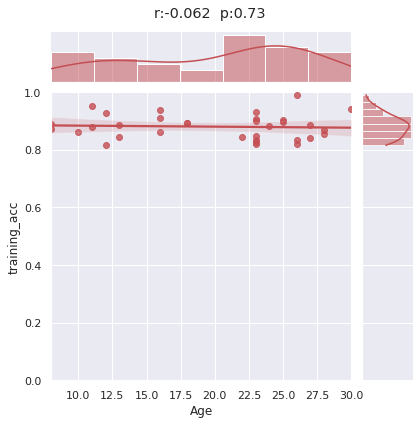

In [2]:
beha_total_score = r'/mnt/data/Project/DCM/participants_exp.xlsx'
data = pd.read_excel(beha_total_score)
data = data[data['usable']==1]
data['training_acc'] = (data['train_ap'] + data['train_dp'])/2
#correlation
res = spearmanr(data['Age'],data['training_acc'])
r = round(res[0],3)
p = round(res[1],3)

# plot
g = sns.jointplot(x="Age", y="training_acc", data=data,
                  kind="reg", truncate=False,
                  xlim=(8, 30), ylim=(0, 1),
                  color="r", height=6)
#move overall title up
g.fig.subplots_adjust(top=0.92)
g.fig.suptitle('r:{}  p:{}'.format(r,p))


savepath = r'/mnt/data/Project/DCM/BIDS/derivatives/behaviour/result/analysis/age-training.png'
g.savefig(savepath,bbox_inches='tight',pad_inches=0,dpi=300)

### Age - 1D Inference

33


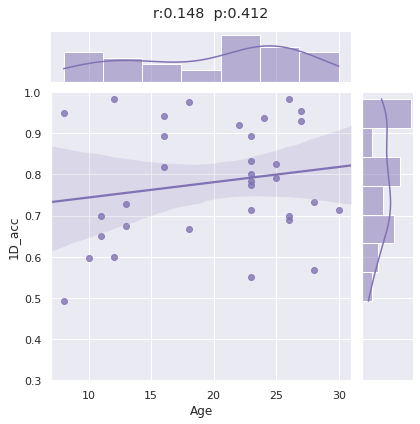

In [3]:
beha_total_score = r'/mnt/data/Project/DCM/participants_exp.xlsx'
data = pd.read_excel(beha_total_score)
data = data[data['usable']==1]
print(len(data))
res = spearmanr(data['Age'],data['1D_acc'])
r = round(res[0],3)
p = round(res[1],3)

# plot
g = sns.jointplot(x="Age", y="1D_acc", data=data,
                  kind="reg", truncate=False,
                  xlim=(7, 31), ylim=(0.3, 1),
                  color="m", height=6)

#move overall title up
g.fig.subplots_adjust(top=0.92)
g.fig.suptitle('r:{}  p:{}'.format(r,p))

savepath = r'/mnt/data/Project/DCM/BIDS/derivatives/behaviour/result/analysis/age-1Dtask.png'
g.savefig(savepath,bbox_inches='tight',pad_inches=0,dpi=300)

### Age - 2D Inference game1

33


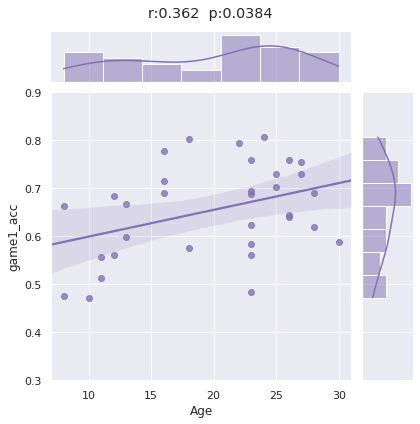

In [4]:
beha_total_score = r'/mnt/data/Project/DCM/participants_exp.xlsx'
data = pd.read_excel(beha_total_score)
data = data[data['usable']==1]
print(len(data))
#data = data[data['Age']<28]
# cal correlation
res = spearmanr(data['Age'],data['game1_acc'])
r = round(res[0],3)
p = round(res[1],4)

# plot
g = sns.jointplot(x="Age", y="game1_acc", data=data,
                  kind="reg", truncate=False,
                  xlim=(7, 31), ylim=(0.3, 0.9),
                  color="m", height=6)

#move overall title up
g.fig.subplots_adjust(top=0.92)
g.fig.suptitle('r:{}  p:{}'.format(r,p))

savepath = r'/mnt/data/Project/DCM/BIDS/derivatives/behaviour/result/analysis/age-2Dgame1.png'
g.savefig(savepath,bbox_inches='tight',pad_inches=0,dpi=300)

### Age - 2D Inference game1 by controling training performance

In [5]:
import pingouin as pg
import pandas
import statsmodels.api as sm

beha_total_score = r'/mnt/data/Project/DCM/participants_exp.xlsx'
data = pd.read_excel(beha_total_score)
data = data[data['usable']==1]
data['training_acc'] = (data['train_ap'] + data['train_dp'])/2
pg.partial_corr(data=data, x='Age', y='game1_acc', covar='training_acc')

,n,r,CI95%,p-val
pearson,33,0.396471,"[0.06, 0.65]",0.024671


### Age - 2D Inference game1 by controling 1D performance

In [6]:
import pingouin as pg
import pandas
import statsmodels.api as sm

beha_total_score = r'/mnt/data/Project/DCM/participants_exp.xlsx'
data = pd.read_excel(beha_total_score)
data = data[data['usable']==1]
data['training_acc'] = (data['train_ap'] + data['train_dp'])/2
pg.partial_corr(data=data, x='Age', y='game1_acc', covar='1D_acc')

,n,r,CI95%,p-val
pearson,33,0.454552,"[0.13, 0.69]",0.008959


### Partial Regression

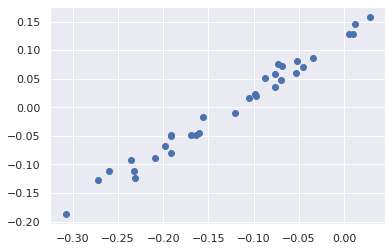

In [7]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

beha_total_score = r'/mnt/data/Project/DCM/participants_exp.xlsx'
data = pd.read_excel(beha_total_score)
data = data[data['usable']==1]
data['training_acc'] = (data['train_ap'] + data['train_dp'])/2

expend_regression = LinearRegression().fit(data[['Age']], data["1D_acc"])
total_regression = LinearRegression().fit(data[['Age']], data["game1_acc"])
expend_residuals = data["game1_acc"] - expend_regression.predict(data[['Age']])
total_residuals = data["game1_acc"] - total_regression.predict(data[['Age']])
plt.scatter(expend_residuals, total_residuals)

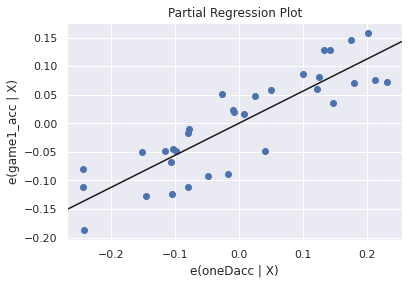

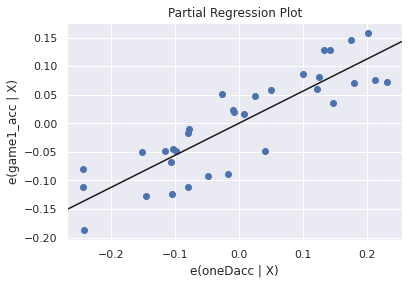

In [8]:
import pandas as pd
import statsmodels.api as sm
beha_total_score = r'/mnt/data/Project/DCM/participants_exp.xlsx'
data = pd.read_excel(beha_total_score)
data = data[data['usable']==1]
data['training_acc'] = (data['train_ap'] + data['train_dp'])/2
data['oneDacc'] = data['1D_acc']
sm.graphics.plot_partregress("game1_acc", "oneDacc", ["Age"], data=data,obs_labels=False)

### Age - game2 

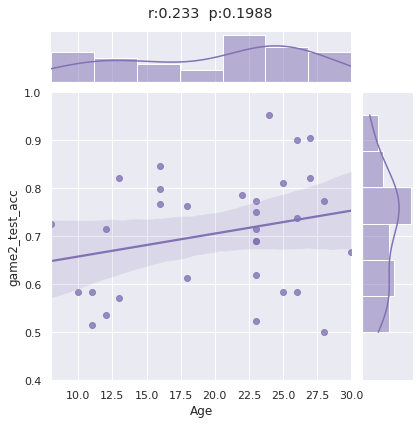

In [9]:
#age-game2
beha_total_score = r'/mnt/data/Project/DCM/participants_exp.xlsx'
data = pd.read_excel(beha_total_score)
data = data[data['usable']==1]
#data = data[data['Age']<28]

# plot
g = sns.jointplot(x="Age", y="game2_test_acc", data=data,
                  kind="reg", truncate=False,
                  xlim=(8, 30), ylim=(0.4, 1),
                  color="m", height=6)

# cal correlation
data_droped = data.dropna(subset=['game2_test_acc'])
res = spearmanr(data_droped['Age'],data_droped['game2_test_acc'])
r = round(res[0],3)
p = round(res[1],4)

#move overall title up
g.fig.subplots_adjust(top=0.92)
g.fig.suptitle('r:{}  p:{}'.format(r,p))
savepath = r'/mnt/data/Project/DCM/BIDS/derivatives/behaviour/result/analysis/age-2Dgame2test.png'
g.savefig(savepath,bbox_inches='tight',pad_inches=0,dpi=300)

In [15]:
import pingouin as pg
import pandas
import statsmodels.api as sm

beha_total_score = r'/mnt/data/Project/DCM/participants_exp.xlsx'
data = pd.read_excel(beha_total_score)
data = data[data['usable']==1]
data['game2train_acc'] = (data['game2_train_ap'] + data['game2_train_dp'])/2
pg.partial_corr(data=data, x='Age', y='game2_test_acc', covar='game2train_acc')

,n,r,CI95%,p-val
pearson,31,0.232586,"[-0.14, 0.55]",0.216146


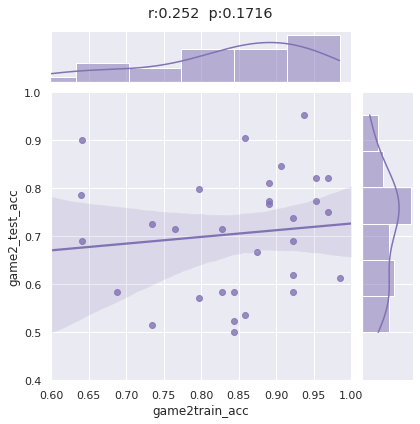

In [26]:
#age-game2
beha_total_score = r'/mnt/data/Project/DCM/participants_exp.xlsx'
data = pd.read_excel(beha_total_score)
data = data[data['usable']==1]
data['game2train_acc'] = (data['game2_train_ap'] + data['game2_train_dp'])/2

# plot
g = sns.jointplot(x="game2train_acc", y="game2_test_acc", data=data,
                  kind="reg", truncate=False,
                  xlim=(0.6, 1), ylim=(0.4, 1),
                  color="m", height=6)

# cal correlation
data_droped = data.dropna(subset=['game2train_acc','game2_test_acc'])
res = spearmanr(data_droped['game2train_acc'],data_droped['game2_test_acc'])
r = round(res[0],3)
p = round(res[1],4)

#move overall title up
g.fig.subplots_adjust(top=0.92)
g.fig.suptitle('r:{}  p:{}'.format(r,p))
savepath = r'/mnt/data/Project/DCM/BIDS/derivatives/behaviour/result/analysis/game2train-test.png'
g.savefig(savepath,bbox_inches='tight',pad_inches=0,dpi=300)

In [19]:
data['game2train_acc']

2     0.64100
3     0.89050
6     0.98450
7     0.64050
8     0.82800
9     0.73400
11    0.84350
12    0.76550
13    0.79700
14    0.68750
15    0.89050
18    0.84400
19    0.96900
20    0.82800
21    0.95300
22    0.85900
23    0.87500
24    0.95300
25    0.92200
26    0.85900
27    0.96900
28    0.79700
29    0.90650
30    0.92200
32        NaN
33    0.64100
34    0.84350
36    0.56305
38    0.92200
39    0.89050
42    0.93750
43    0.92200
44    0.73450
Name: game2train_acc, dtype: float64

In [12]:
data

,Unnamed: 0,Participant_ID,Exp_ID,Name,Date(预约日期),Age,train_ap,train_dp,1D_ap,1D_dp,...,game2_test_acc,usable,Sex,Group,训练主试,field_mapping1,field_mapping2,field_mapping3,field_mapping2_1,Location
2,2,sub_005,5,OuJianXin,2021.10.19,26,0.990,0.990,1.000,0.967,...,0.900,1,male,adult,瞿宇堃,NaN,NaN,NaN,NaN,北大
3,3,sub_006,I1,徐凡迪,2021.10.30,16,0.950,0.870,0.817,0.817,...,0.767,1,male,child,瞿宇堃,NaN,NaN,NaN,NaN,北大
6,6,sub_009,K4,郁章煦,2021.11.27,18,0.940,0.845,0.642,0.692,...,0.612,1,male,child,瞿宇堃,NaN,NaN,NaN,NaN,生物物理所
7,7,sub_010,Z1,郑晖,2021.11.27,22,0.820,0.870,0.883,0.958,...,0.786,1,male,adult,瞿宇堃,NaN,NaN,NaN,NaN,生物物理所
8,8,sub_011,E11,曾典,2021.11.28,11,0.965,0.940,0.650,0.650,...,0.583,1,male,child,王海腾,NaN,NaN,NaN,NaN,北大
9,9,sub_012,E2,曾源,2021.11.28,11,0.865,0.890,0.642,0.758,...,0.516,1,male,child,王海腾,NaN,NaN,NaN,NaN,北大
11,11,sub_014,Z4,邢倩,2021.12.4,28,0.920,0.815,0.467,0.667,...,0.500,1,female,adult,陈率,"1,2,3","4,5,6","7,8,9,10",NaN,生物物理所
12,12,sub_015,E12,邢悦萌,2021.12.5,12,0.960,0.895,0.983,0.983,...,0.714,1,female,child,陈率,"1,2,3","4,5",NaN,6.0,生物物理所
13,13,sub_016,I4,王奕霏,2021.12.5,16,0.820,0.900,0.850,0.933,...,0.798,1,female,child,王海腾,"1,2","4,5,6","7,8,9,10",NaN,生物物理所
14,14,sub_017,C11,胡鸣萱,2021.12.11,10,0.865,0.860,0.542,0.655,...,0.583,1,female,child,陈率,"1,2,3","4,5,6","7,8,9,10",NaN,生物物理所


###  Age -  correlation between game1 and game2

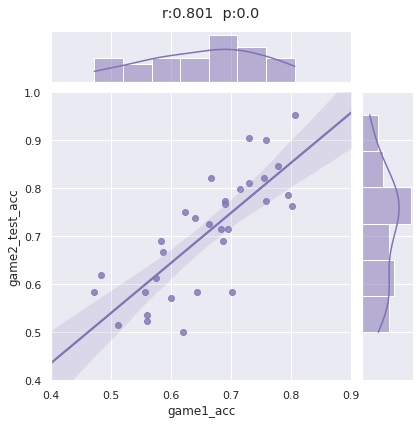

In [10]:
beha_total_score = r'/mnt/data/Project/DCM/participants_exp.xlsx'
data = pd.read_excel(beha_total_score)
data = data[data['usable']==1]

# plot
g = sns.jointplot(x="game1_acc", y="game2_test_acc", data=data,
                  kind="reg", truncate=False,
                  xlim=(0.4, 0.9), ylim=(0.4, 1),
                  color="m", height=6)


data_droped = data.dropna(subset=['game1_acc','game2_test_acc'])
res = spearmanr(data_droped['game1_acc'],data_droped['game2_test_acc'])
r = round(res[0],3)
p = round(res[1],5)


#move overall title up
g.fig.subplots_adjust(top=0.92)
g.fig.suptitle('r:{}  p:{}'.format(r,p))

savepath = r'/mnt/data/Project/DCM/BIDS/derivatives/behaviour/result/analysis/game1-game2.png'
g.savefig(savepath,bbox_inches='tight',pad_inches=0,dpi=300)